

```
THE Last Samurai
- Gempar
- Faisal
- Randi
- Ryo
- Michelle
```



# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt
import seaborn as sns
#import pickle
import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format

# IMPORT DATA

In [2]:
# Define Import Data Function
def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

In [3]:
# Initialize URL
urls = ["https://raw.githubusercontent.com/RyoKusnadi/CSV/master/adult.csv"]
load_dataset('data', urls)

# DATA EXPLORATION

In [4]:
#Columns dipakai untuk ganti nama columns, Separator untuk tentukan delimeter, na_values jika dia ? maka dia akan menjadi NA 
columns = ['age', 'workClass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data = pd.read_csv('data/adult.csv', names=columns, na_values='?',skiprows=1)

In [5]:
data_numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train_data.select_dtypes(include=data_numerics).columns)
print(train_data.select_dtypes(include=data_numerics).shape)
data_numerics = train_data.select_dtypes(include=data_numerics)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

(32561, 6)


In [6]:
display(train_data.select_dtypes(include=['object']).columns)
print(train_data.select_dtypes(include=object).shape)
data_cat = train_data.select_dtypes(include=['object'])

Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

(32561, 9)


In [7]:
train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,"32,561.0","32,561.0","32,561.0","32,561.0","32,561.0","32,561.0"
mean,38.6,"189,778.4",10.1,"1,077.6",87.3,40.4
std,13.6,"105,550.0",2.6,"7,385.3",403.0,12.3
min,17.0,"12,285.0",1.0,0.0,0.0,1.0
25%,28.0,"117,827.0",9.0,0.0,0.0,40.0
50%,37.0,"178,356.0",10.0,0.0,0.0,40.0
75%,48.0,"237,051.0",12.0,0.0,0.0,45.0
max,90.0,"1,484,705.0",16.0,"99,999.0","4,356.0",99.0


In [8]:
train_data[['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income']].describe()

,workClass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


<function matplotlib.pyplot.show(*args, **kw)>

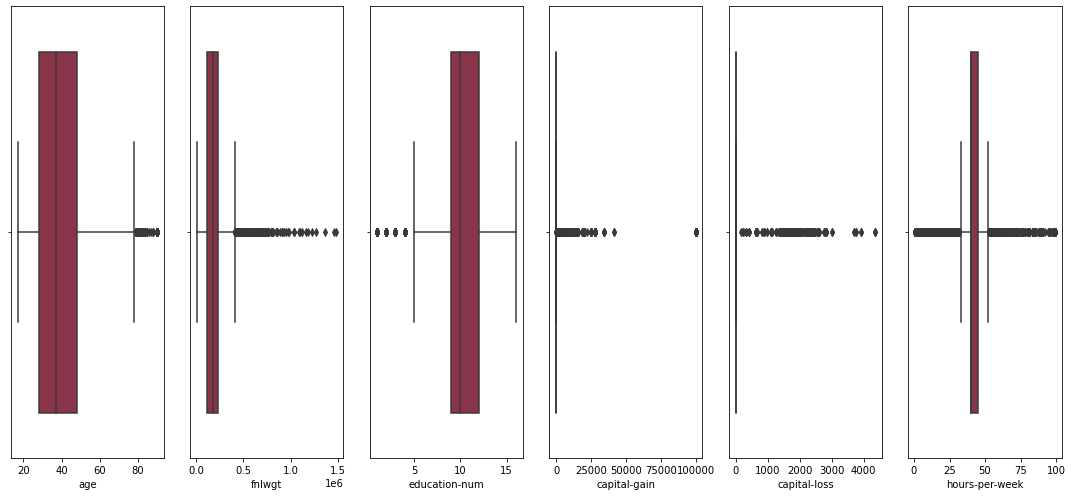

In [9]:
features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(train_data[features[i]],color='#982642')
    plt.tight_layout()
    
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

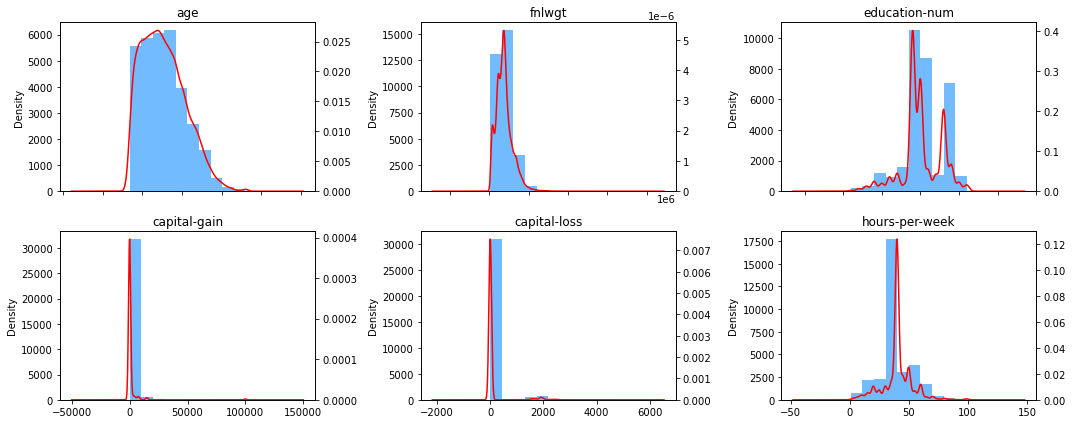

In [10]:
data_num = train_data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#73bbff')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
plt.show

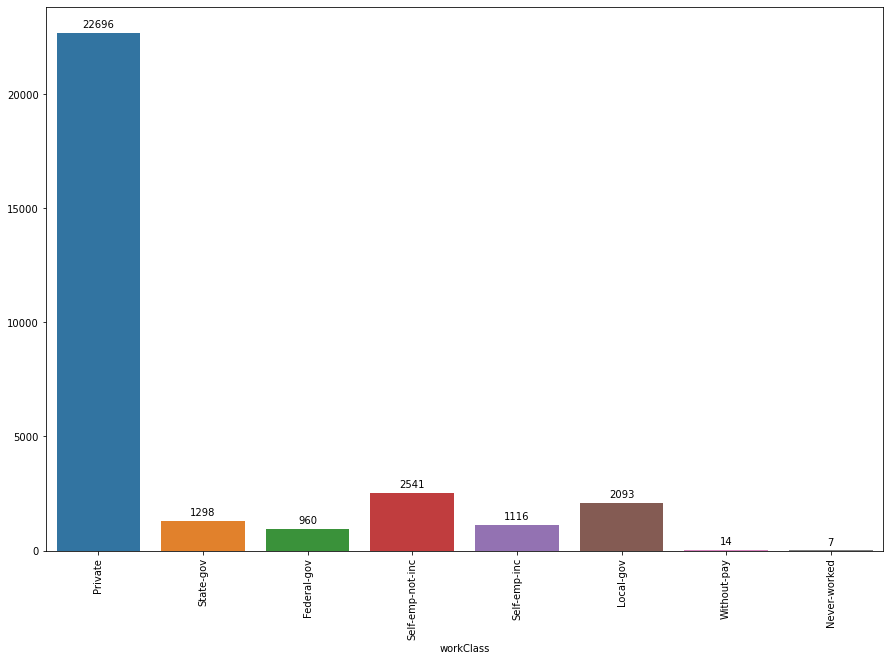

In [11]:
data_category = list(train_data['workClass'].unique())

c = [data_category]
plt.figure(figsize=(15,10))
for i in range(0, len(c)):
    plt.subplot(1, 1, i+1)
    ax = sns.countplot(x='workClass',data=train_data[train_data['workClass'].isin(c[i])])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
        xy = (p.get_x() + p.get_width() / 2, p.get_height()),     
        xytext=(0,3),fontsize=10,
        textcoords="offset points",
        ha ='center', va ='bottom')
        plt.xticks(rotation=90)
        
ax.set_ylabel("")
plt.show()

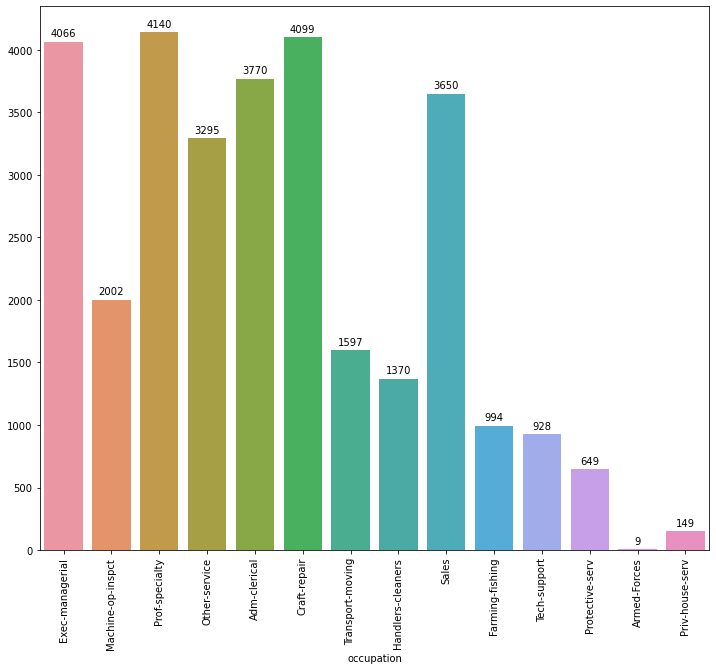

In [12]:
data_category = list(train_data['occupation'].unique())

c = [data_category]
plt.figure(figsize=(12,10))
for i in range(0, len(c)):
    plt.subplot(1, 1, i+1)
    ax = sns.countplot(x='occupation',data=train_data[train_data['occupation'].isin(c[i])])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
        xy = (p.get_x() + p.get_width() / 2, p.get_height()),     
        xytext=(0,3),fontsize=10,
        textcoords="offset points",
        ha ='center', va ='bottom')
        plt.xticks(rotation=90)
        
ax.set_ylabel("")
plt.show()

*italicized text*# DATA CLEANSING

## Missing Values

In [13]:
#Check Missing Value
data_missing_value = train_data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(train_data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,occupation,1843,5.7
1,workClass,1836,5.6
2,native-country,583,1.8


<function matplotlib.pyplot.show(*args, **kw)>

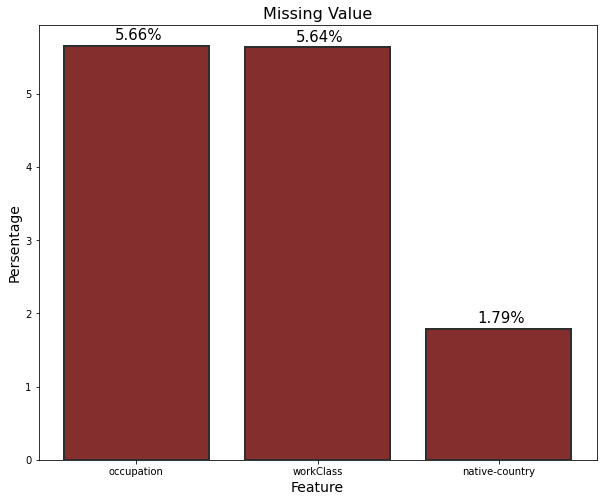

In [14]:
#Visualisasi Missing Value
x = data_missing_value['feature']
y = data_missing_value['percentage']
plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=data_missing_value, 
       color = '#842e2e', 
       edgecolor= '#2e2e2e',
       linewidth = 2) 

plt.title('Missing Value', fontsize = 16)
plt.ylabel('Persentage', fontsize=14)
plt.xlabel('Feature', fontsize=14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.12,y = y[i]+0.08,s = str(round(y[i],2))+'%',size = 15)
plt.tight_layout
plt.show

### Missing Values 'workClass'

In [15]:
train_data[['age','workClass']]

,age,workClass
0,90,NaN
1,82,Private
2,66,NaN
3,54,Private
4,41,Private
...,...,...
32556,22,Private
32557,27,Private
32558,40,Private
32559,58,Private


In [16]:
#def dari condition age 18 >= 'Without-pay' dan age 18 < 'Never-worked'

def conditions(s):
    if (s['age'] >= 18) and (s['workClass'] is np.nan):
        return 'Without-pay'
    elif (s['age'] < 18) and (s['workClass'] is np.nan):
        return 'Never-worked'
    else:
        return s['workClass']

In [17]:
train_data['workClass'] = train_data.apply(conditions, axis=1)

### Missing Values 'Occupation'

In [18]:
#fill na di occupation column dengan 'Other'
train_data['occupation'] = train_data['occupation'].fillna('Other')

### Missing Values 'Native-country'

In [19]:
#dropna di column 'native-country'
train_data.dropna(subset=['native-country'],inplace=True)
train_data.dropna(subset=['income'],inplace=True)

## Duplicate Values

In [20]:
#Show Column yang duplicate
print('Jumlah duplicate values yang ada di data frame ada' ,train_data.duplicated().sum())
duplicate_data = train_data[train_data.duplicated(keep=False)]
duplicate_data.sort_values('fnlwgt', ascending=False)

Jumlah duplicate values yang ada di data frame ada 23


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32419,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
18906,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
19832,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
23720,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
11777,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
27133,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
28796,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [21]:
#Drop duplicate rows
train_data = train_data.drop_duplicates()
train_data

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Without-pay,77053,HS-grad,9,Widowed,Other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Without-pay,186061,Some-college,10,Widowed,Other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
#Cek Keunikan Data
#running a loop of value_counts of each column to find out unique values. 
for column in train_data.columns:
    print ("---- %s ---" % column)
    print (train_data[column].value_counts())

---- age ---
36    875
23    870
31    870
34    862
33    862
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
---- workClass ---
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
Without-pay          1759
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Never-worked           71
Name: workClass, dtype: int64
---- fnlwgt ---
203488    13
123011    13
113364    12
121124    12
148995    12
          ..
48702      1
378045     1
34361      1
357943     1
125489     1
Name: fnlwgt, Length: 21406, dtype: int64
---- education ---
HS-grad         10362
Some-college     7178
Bachelors        5208
Masters          1673
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           626
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           317
1st-4th           161
Preschool          49
Name: educat

## Drop Values

In [23]:
train_data=train_data.drop('fnlwgt', 1)
train_data=train_data.drop('education-num', 1)

## Outliers

In [24]:
Q1 = train_data['age'].quantile(0.25)
Q3 = train_data['age'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train_data['age'] >= low_limit) & (train_data['age'] <= high_limit))
train_data = train_data[filtered_entries]

In [25]:
Q1 = train_data['capital-gain'].quantile(0.25)
Q3 = train_data['age'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train_data['age'] >= low_limit) & (train_data['age'] <= high_limit))
train_data = train_data[filtered_entries]

In [26]:
Q1 = train_data['capital-loss'].quantile(0.25)
Q3 = train_data['age'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train_data['age'] >= low_limit) & (train_data['age'] <= high_limit))
train_data = train_data[filtered_entries]

In [27]:
Q1 = train_data['hours-per-week'].quantile(0.25)
Q3 = train_data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train_data['hours-per-week'] >= low_limit) & (train_data['hours-per-week'] <= high_limit))
train_data = train_data[filtered_entries]

## Copy Train_Data

In [28]:
train_datavis = train_data.copy()
train_data_onehot = train_data.copy()

In [29]:
train_data_onehot = train_data_onehot.drop(columns=['capital-loss'])

Section ini kami lakukan untuk membedakan dataset mana yang kami gunakan untuk visualisasi dan feature enginering one-hot encoding maupun label encoding, dengan alasan mempermudah kami melakukan coding secara terpisah.

# FEATURE ENGGINERING

## Train Data One Hot Encoding

In [30]:
train_data_onehot['age'] = train_data_onehot['age'].map({17: 'Productive-age',18: 'Productive-age',19: 'Productive-age',20: 'Productive-age',21: 'Productive-age',22: 'Productive-age',23: 'Productive-age',24: 'Productive-age',25: 'Productive-age',26: 'Productive-age',27: 'Productive-age',28: 'Productive-age',29: 'Productive-age',30: 'Productive-age',31: 'Productive-age',32: 'Productive-age',33: 'Productive-age',34: 'Productive-age',35: 'Productive-age',36: 'Productive-age',37: 'Productive-age',38: 'Productive-age',39: 'Productive-age',40: 'Productive-age',41: 'Productive-age',42: 'Productive-age',43: 'Productive-age',44: 'Productive-age',45: 'Productive-age',46: 'Productive-age',47: 'Productive-age',48: 'Above-productive',49: 'Above-productive',50: 'Above-productive',51: 'Above-productive',52: 'Above-productive',53: 'Above-productive',54: 'Above-productive',55: 'Above-productive',56: 'Above-productive',57: 'Above-productive',58: 'Above-productive',59: 'Above-productive',60: 'Above-productive',61: 'Above-productive',62: 'Above-productive',63: 'Above-productive',64: 'Aged',65: 'Aged',66: 'Aged',67: 'Aged',68: 'Aged',69: 'Aged',70: 'Aged',71: 'Aged',72: 'Aged',73: 'Aged',74: 'Aged',75: 'Aged',76: 'Aged',77: 'Aged',78: 'Aged',79: 'Aged',80: 'Aged',81: 'Aged',82: 'Aged',83: 'Aged',84: 'Aged',85: 'Aged',86: 'Aged',87: 'Aged',88: 'Aged',90: 'Aged'}).astype(str)
train_data_onehot['income'] = train_data_onehot['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
# train_data_onehot['capital-gain'] = train_data_onehot['capital-gain'].map({0: 0, 114: 1,401: 1,594: 1,914: 1,991: 1,1055: 1,1086: 1,1111: 1,1151: 1,1173: 1,1409: 1,1424: 1,1455: 1,1471: 1,1506: 1,1639: 1,1797: 1,1831: 1,1848: 1,2009: 1,2036: 1,2050: 1,2062: 1,2105: 1,2174: 1,2176: 1,2202: 1,2228: 1,2290: 1,2329: 1,2346: 1,2354: 1,2387: 1,2407: 1,2414: 1,2463: 1,2538: 1,2580: 1,2597: 1,2635: 1,2653: 1,2829: 1,2885: 1,2907: 1,2936: 1,2961: 1,2964: 1,2977: 1,2993: 1,3103: 1,3137: 1,3273: 1,3325: 1,3411: 1,3418: 1,3432: 1,3456: 1,3464: 1,3471: 1,3674: 1,3781: 1,3818: 1,3887: 1,3908: 1,3942: 1,4064: 1,4101: 1,4386: 1,4416: 1,4508: 1,4650: 1,4687: 1,4787: 1,4865: 1,4931: 1,4934: 1,5013: 1,5060: 1,5178: 1,5455: 1,5556: 1,5721: 1,6097: 1,6360: 1,6418: 1,6497: 1,6514: 1,6723: 1,6767: 1,6849: 1,7298: 1,7430: 1,7443: 1,7688: 1,7896: 1,7978: 1,8614: 1,9386: 1,9562: 1,10520: 1,10566: 1,10605: 1,11678: 1,13550: 1,14084: 1,14344: 1,15020: 1,15024: 1,15831: 1,18481: 1,20051: 1,22040: 1,25124: 1,25236: 1,27828: 1,34095: 1,41310: 1,99999: 1}).astype(int)
# train_data_onehot['capital-loss'] = train_data_onehot['capital-loss'].map({0: 0, 155: 1,213: 1,323: 1,419: 1,625: 1,653: 1,810: 1,880: 1,974: 1,1092: 1,1138: 1,1258: 1,1340: 1,1380: 1,1408: 1,1411: 1,1485: 1,1504: 1,1539: 1,1564: 1,1573: 1,1579: 1,1590: 1,1594: 1,1602: 1,1617: 1,1628: 1,1648: 1,1651: 1,1668: 1,1669: 1,1672: 1,1719: 1,1721: 1,1726: 1,1735: 1,1740: 1,1741: 1,1755: 1,1762: 1,1816: 1,1825: 1,1844: 1,1848: 1,1876: 1,1887: 1,1902: 1,1944: 1,1974: 1,1977: 1,1980: 1,2001: 1,2002: 1,2042: 1,2051: 1,2057: 1,2080: 1,2129: 1,2149: 1,2163: 1,2174: 1,2179: 1,2201: 1,2205: 1,2206: 1,2231: 1,2238: 1,2246: 1,2258: 1,2267: 1,2282: 1,2339: 1,2352: 1,2377: 1,2392: 1,2415: 1,2444: 1,2457: 1,2467: 1,2472: 1,2489: 1,2547: 1,2559: 1,2603: 1,2754: 1,2824: 1,3004: 1,3683: 1,3770: 1,3900: 1,4356: 1}).astype(int)
train_data_onehot['marital-status'] = train_data_onehot['marital-status'].map({'Widowed': 'Not married', 'Married-spouse-absent': 'Married', 'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married', 'Divorced': 'Not married','Separated': 'Not married', 'Never-married': 'Married'}).astype(str)
train_data_onehot['workClass'] = train_data_onehot['workClass'].map({'Self-emp-inc': 'Without-pay', 'Without-pay': 'Without-pay','Federal-gov': 'Government', 'State-gov': 'Government', 'Local-gov': 'Government','Private': 'Private', 'Self-emp-not-inc': 'Without-pay','Never-worked':'Not-work'}).astype(str)
train_data_onehot['education'] = train_data_onehot['education'].map({'Preschool': 'Preschool', '1st-4th': 'Primary-school', '5th-6th': 'Primary-school', '7th-8th': 'Junior-high-school','9th': 'Junior-high-school','10th': 'Senior-high-school', '11th': 'Senior-high-school', '12th': 'Senior-high-school','HS-grad': 'Senior-high-school','Prof-school': 'Senior-high-school','Assoc-voc': 'Senior-high-school','Assoc-acdm': 'Senior-high-school', 'Some-college': 'Senior-high-school','Bachelors': 'Bachelors', 'Masters': 'Masters', 'Doctorate': 'Doctorate' }).astype(str)
train_data_onehot['native-country'] = train_data_onehot['native-country'].map({'Canada': 'USA','Outlying-US(Guam-USVI-etc)': 'USA','United-States': 'USA','Cambodia': 'Asia','China': 'Asia','Hong': 'Asia','India': 'Asia','Iran': 'Asia','Japan': 'Asia','Laos': 'Asia','Philippines': 'Asia','Taiwan': 'Asia','Thailand': 'Asia','Vietnam': 'Asia', 'Columbia': 'South America','Cuba': 'South America','Dominican-Republic': 'South America','Ecuador': 'South America','El-Salvador': 'South America','Guatemala': 'South America','Haiti': 'South America','Honduras': 'South America','Jamaica': 'South America','Mexico': 'South America','Nicaragua': 'South America','Peru': 'South America','Puerto-Rico': 'South America','South': 'South America','Trinadad&Tobago': 'South America','England': 'Europe','France': 'Europe','Germany': 'Europe','Greece': 'Europe','Holand-Netherlands': 'Europe','Hungary': 'Europe','Ireland': 'Europe','Italy': 'Europe','Poland': 'Europe','Portugal': 'Europe','Scotland': 'Europe','Yugoslavia': 'Europe'}).astype(str)

In [31]:
train_data_One = pd.get_dummies(train_data_onehot)
train_data_One

,capital-gain,hours-per-week,income,age_Above-productive,age_Aged,age_Productive-age,workClass_Government,workClass_Not-work,workClass_Private,workClass_Without-pay,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Asia,native-country_Europe,native-country_South America,native-country_USA
2,0,40,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,40,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,0,45,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
6,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,40,1,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
32556,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
32557,0,38,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
32558,0,40,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


## Train Data Label Encoding

In [32]:
train_data['age'] = train_data['age'].map({17: 0,18: 0,19: 0,20: 0,21: 0,22: 0,23: 0,24: 0,25: 0,26: 0,27: 0,28: 0,29: 0,30: 0,31: 0,32: 0,33: 0,34: 0,35: 0,36: 0,37: 0,38: 0,39: 0,40: 0,41: 0,42: 0,43: 0,44: 0,45: 0,46: 0,47: 0,48: 1,49: 1,50: 1,51: 1,52: 1,53: 1,54: 1,55: 1,56: 1,57: 1,58: 1,59: 1,60: 1,61: 1,62: 1,63: 1,64: 2,65: 2,66: 2,67: 2,68: 2,69: 2,70: 2,71: 2,72: 2,73: 2,74: 2,75: 2,76: 2,77: 2,78: 2,79: 2,80: 2,81: 2,82: 2,83: 2,84: 2,85: 2,86: 2,87: 2,88: 2,90: 2}).astype(int)
train_data['income'] = train_data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
train_data['capital-gain'] = train_data['capital-gain'].map({0: 0, 114: 1,401: 1,594: 1,914: 1,991: 1,1055: 1,1086: 1,1111: 1,1151: 1,1173: 1,1409: 1,1424: 1,1455: 1,1471: 1,1506: 1,1639: 1,1797: 1,1831: 1,1848: 1,2009: 1,2036: 1,2050: 1,2062: 1,2105: 1,2174: 1,2176: 1,2202: 1,2228: 1,2290: 1,2329: 1,2346: 1,2354: 1,2387: 1,2407: 1,2414: 1,2463: 1,2538: 1,2580: 1,2597: 1,2635: 1,2653: 1,2829: 1,2885: 1,2907: 1,2936: 1,2961: 1,2964: 1,2977: 1,2993: 1,3103: 1,3137: 1,3273: 1,3325: 1,3411: 1,3418: 1,3432: 1,3456: 1,3464: 1,3471: 1,3674: 1,3781: 1,3818: 1,3887: 1,3908: 1,3942: 1,4064: 1,4101: 1,4386: 1,4416: 1,4508: 1,4650: 1,4687: 1,4787: 1,4865: 1,4931: 1,4934: 1,5013: 1,5060: 1,5178: 1,5455: 1,5556: 1,5721: 1,6097: 1,6360: 1,6418: 1,6497: 1,6514: 1,6723: 1,6767: 1,6849: 1,7298: 1,7430: 1,7443: 1,7688: 1,7896: 1,7978: 1,8614: 1,9386: 1,9562: 1,10520: 1,10566: 1,10605: 1,11678: 1,13550: 1,14084: 1,14344: 1,15020: 1,15024: 1,15831: 1,18481: 1,20051: 1,22040: 1,25124: 1,25236: 1,27828: 1,34095: 1,41310: 1,99999: 1}).astype(int)
train_data['capital-loss'] = train_data['capital-loss'].map({0: 0, 155: 1,213: 1,323: 1,419: 1,625: 1,653: 1,810: 1,880: 1,974: 1,1092: 1,1138: 1,1258: 1,1340: 1,1380: 1,1408: 1,1411: 1,1485: 1,1504: 1,1539: 1,1564: 1,1573: 1,1579: 1,1590: 1,1594: 1,1602: 1,1617: 1,1628: 1,1648: 1,1651: 1,1668: 1,1669: 1,1672: 1,1719: 1,1721: 1,1726: 1,1735: 1,1740: 1,1741: 1,1755: 1,1762: 1,1816: 1,1825: 1,1844: 1,1848: 1,1876: 1,1887: 1,1902: 1,1944: 1,1974: 1,1977: 1,1980: 1,2001: 1,2002: 1,2042: 1,2051: 1,2057: 1,2080: 1,2129: 1,2149: 1,2163: 1,2174: 1,2179: 1,2201: 1,2205: 1,2206: 1,2231: 1,2238: 1,2246: 1,2258: 1,2267: 1,2282: 1,2339: 1,2352: 1,2377: 1,2392: 1,2415: 1,2444: 1,2457: 1,2467: 1,2472: 1,2489: 1,2547: 1,2559: 1,2603: 1,2754: 1,2824: 1,3004: 1,3683: 1,3770: 1,3900: 1,4356: 1}).astype(int)
train_data['sex'] = train_data['sex'].map({'Female': 0, 'Male': 1}).astype(int)
train_data['race'] = train_data['race'].map({'Other': 0, 'White': 1,'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
train_data['marital-status'] = train_data['marital-status'].map({'Widowed': 0, 'Married-spouse-absent': 1, 'Married-civ-spouse': 1, 'Married-AF-spouse': 1, 'Divorced': 0,'Separated': 0, 'Never-married': 1}).astype(int)
train_data['workClass'] = train_data['workClass'].map({'Self-emp-inc': 0, 'Without-pay': 0,'Federal-gov': 1, 'State-gov': 1, 'Local-gov': 1,'Private': 3, 'Self-emp-not-inc': 0,'Never-worked':2}).astype(int)
train_data['education'] = train_data['education'].map({'Preschool': 0, '1st-4th': 1, '5th-6th': 1, '7th-8th': 2,'9th': 2,'10th': 3, '11th': 3, '12th': 3,'HS-grad': 3,'Prof-school': 3,'Assoc-voc': 3,'Assoc-acdm': 3, 'Some-college': 3,'Bachelors': 4, 'Masters': 5, 'Doctorate': 6 }).astype(int)
train_data['occupation'] = train_data['occupation'].map({ 'Tech-support': 1, 'Handlers-cleaners': 2, 'Adm-clerical': 3, 'Farming-fishing': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14,'Other':15}).astype(int)
train_data['relationship'] = train_data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Unmarried': 2, 'Other-relative': 3,'Husband': 4,'Own-child': 5}).astype(int)
train_data['native-country'] = train_data['native-country'].map({'Canada': 0,'Outlying-US(Guam-USVI-etc)': 0,'United-States': 0,'Cambodia': 1,'China': 1,'Hong': 1,'India': 1,'Iran': 1,'Japan': 1,'Laos': 1,'Philippines': 1,'Taiwan': 1,'Thailand': 1,'Vietnam': 1, 'Columbia': 2,'Cuba': 2,'Dominican-Republic': 2,'Ecuador': 2,'El-Salvador': 2,'Guatemala': 2,'Haiti': 2,'Honduras': 2,'Jamaica': 2,'Mexico': 2,'Nicaragua': 2,'Peru': 2,'Puerto-Rico': 2,'South': 2,'Trinadad&Tobago': 2,'England': 3,'France': 3,'Germany': 3,'Greece': 3,'Holand-Netherlands': 3,'Hungary': 3,'Ireland': 3,'Italy': 3,'Poland': 3,'Portugal': 3,'Scotland': 3,'Yugoslavia': 3}).astype(int)

In [33]:
#EDA dari hasil data cleansing
train_data.describe()

,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,"23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0","23,058.0"
mean,0.3,2.3,3.2,0.8,7.4,2.7,1.2,0.7,0.1,0.0,41.6,0.2,0.3
std,0.5,1.1,0.7,0.4,3.7,1.9,0.5,0.5,0.3,0.2,4.0,0.6,0.4
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0
25%,0.0,1.0,3.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0
50%,0.0,3.0,3.0,1.0,7.0,4.0,1.0,1.0,0.0,0.0,40.0,0.0,0.0
75%,0.0,3.0,3.0,1.0,10.0,4.0,1.0,1.0,0.0,0.0,42.0,0.0,1.0
max,2.0,3.0,6.0,1.0,15.0,5.0,4.0,1.0,1.0,1.0,52.0,3.0,1.0


# DATA VISUALIZATION

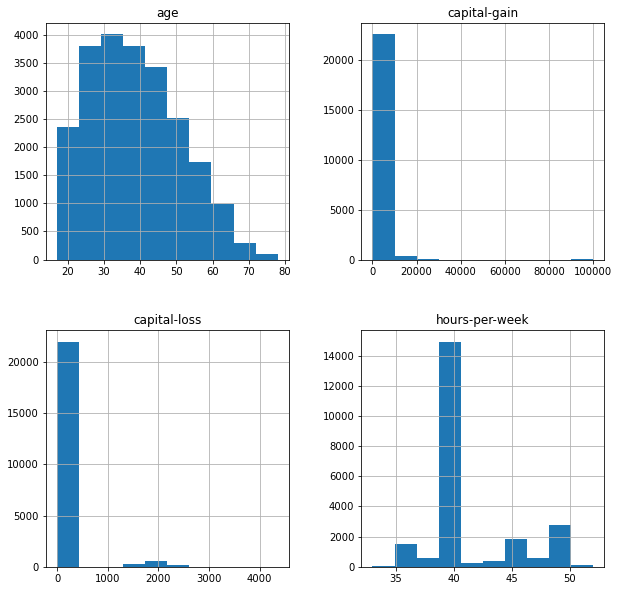

In [34]:
train_datavis.hist(figsize=(10,10));

### Distribution

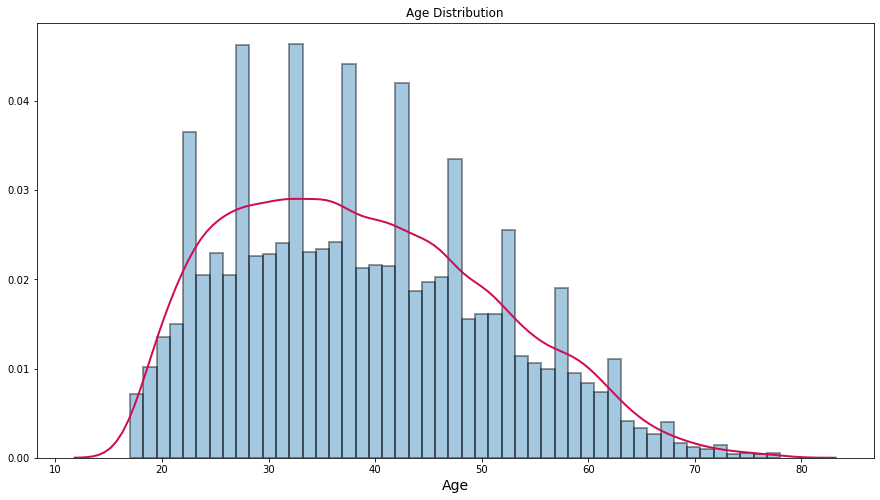

In [35]:
plt.figure(figsize=(15,8))
ax=sns.distplot(train_datavis['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age',fontsize = 14);

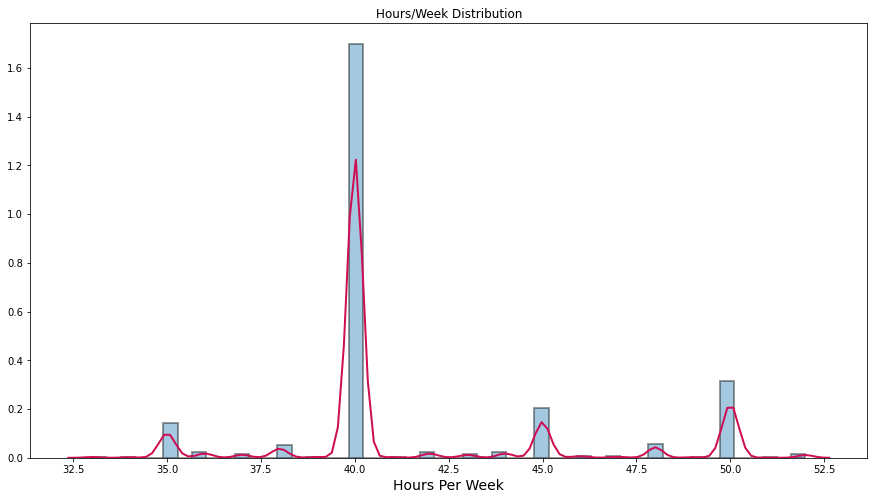

In [36]:
plt.figure(figsize=(15,8))
ax=sns.distplot(train_datavis['hours-per-week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours/Week Distribution')
ax.set_xlabel('Hours Per Week', fontsize = 14);

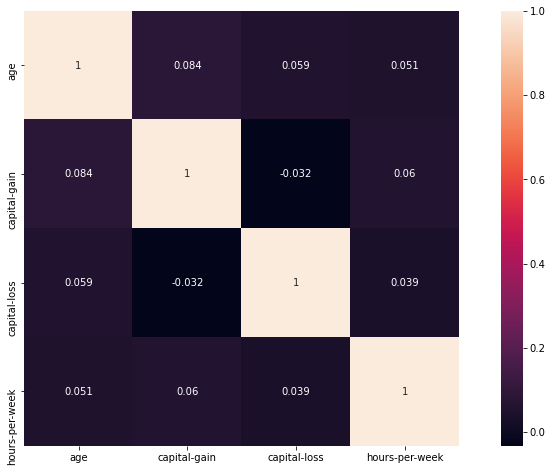

In [37]:
num_col = train_datavis.dtypes[train_datavis.dtypes != 'object']

fig = plt.figure(figsize = (15,8))
sns.heatmap(train_datavis[list(num_col.index)].corr(),annot = True,square = True)
ax.set_title('')
ax.set_xlabel('Hours Per Week', fontsize = 14);

In [38]:
ocpt = pd.crosstab(train_datavis['occupation'], train_datavis['income'])
age= pd.crosstab(train_datavis['age'], train_datavis['income'])
wc= pd.crosstab(train_datavis['workClass'], train_datavis['income'])
edu = pd.crosstab(train_datavis['education'], train_datavis['income'])
marit_stat = pd.crosstab(train_datavis['marital-status'], train_datavis['income'])
race = pd.crosstab(train_datavis['race'], train_datavis['income'])
country = pd.crosstab(train_datavis['native-country'], train_datavis['income'])
relasi = pd.crosstab(train_datavis['relationship'], train_datavis['income'])
sextype = pd.crosstab(train_datavis['sex'], train_datavis['income'])

### Viz Occupation

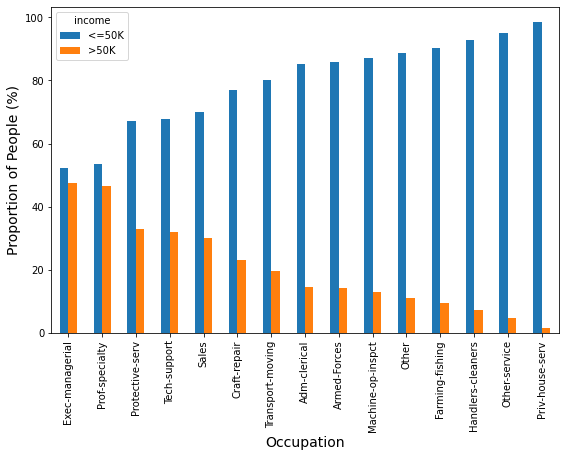

In [39]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(ocpt.div(ocpt.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

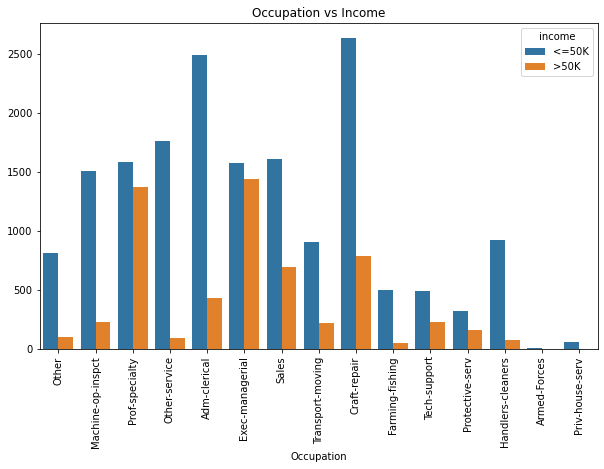

In [40]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(train_datavis['occupation'], hue=train_datavis['income'])
ax.set_title('Occupation vs Income')
plt.xlabel("Occupation",fontsize = 10);
plt.xticks(rotation=90)
plt.ylabel('');

### Viz WorkClass

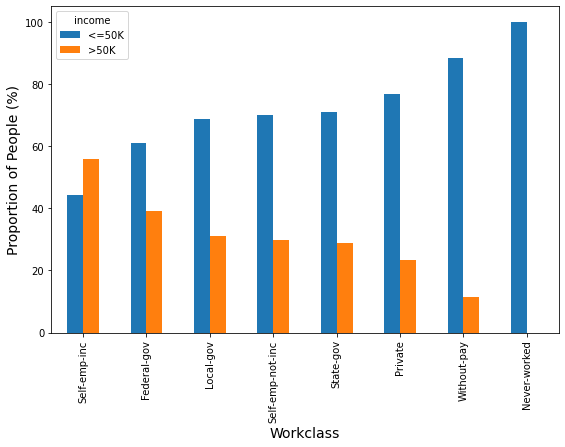

In [41]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,2)
(wc.div(wc.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

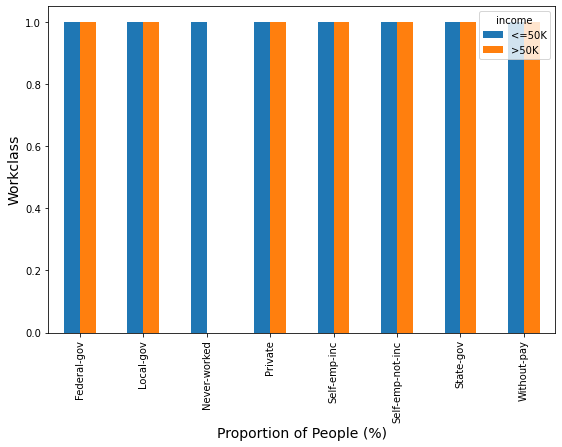

In [42]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,2)
(wc.div(wc,axis = 0)).plot(kind = 'bar',ax=ax);
plt.xlabel('Proportion of People (%)',fontsize = 14);
plt.ylabel("Workclass",fontsize = 14);

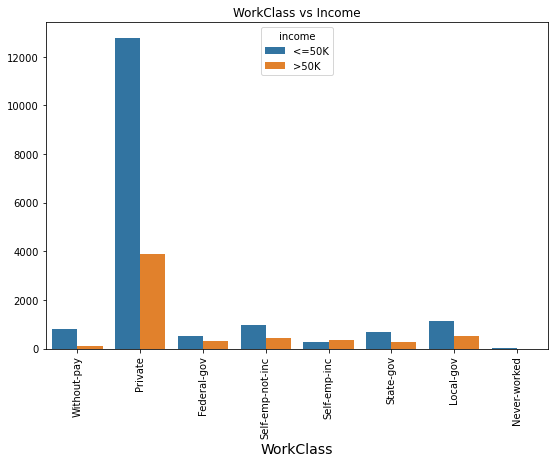

In [43]:
fig = plt.figure(figsize = (9,6))
ax=sns.countplot(train_datavis['workClass'], hue=train_datavis['income'])
ax.set_title('WorkClass vs Income')
plt.xlabel("WorkClass",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

### Viz Education

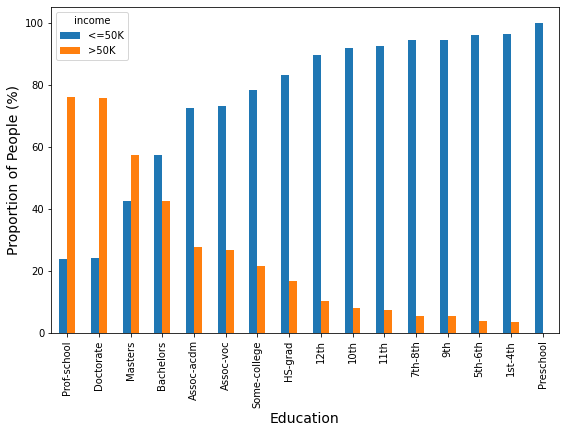

In [44]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(edu.div(edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

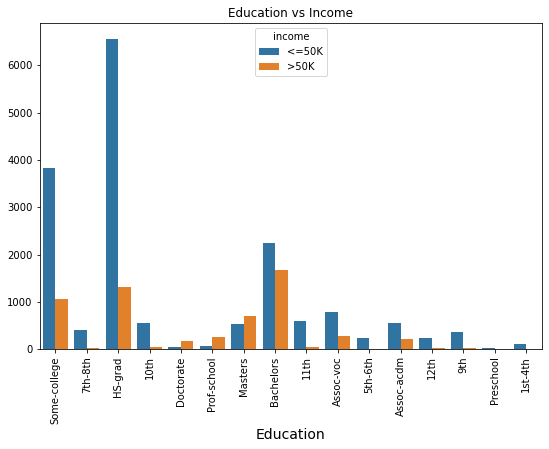

In [45]:
fig = plt.figure(figsize = (9,6))
ax=sns.countplot(train_datavis['education'], hue=train_datavis['income'])
ax.set_title('Education vs Income')
plt.xlabel("Education",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

### Viz Marital

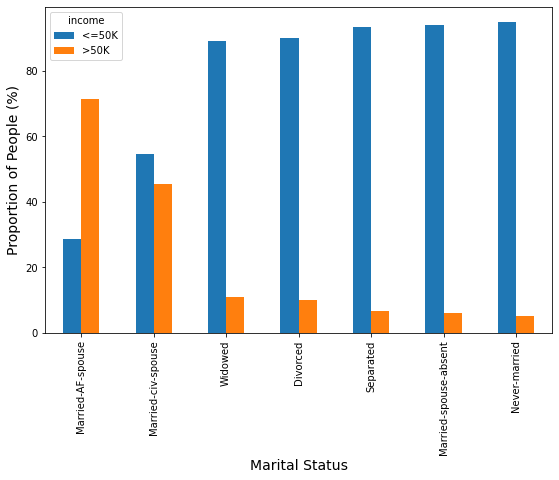

In [46]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,2)
(marit_stat.div(marit_stat.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

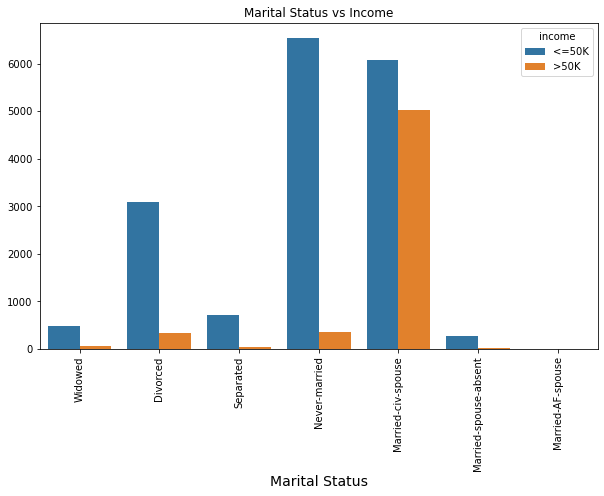

In [47]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(train_datavis['marital-status'], hue=train_datavis['income'])
ax.set_title('Marital Status vs Income')
plt.xlabel("Marital Status",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

### Viz Race

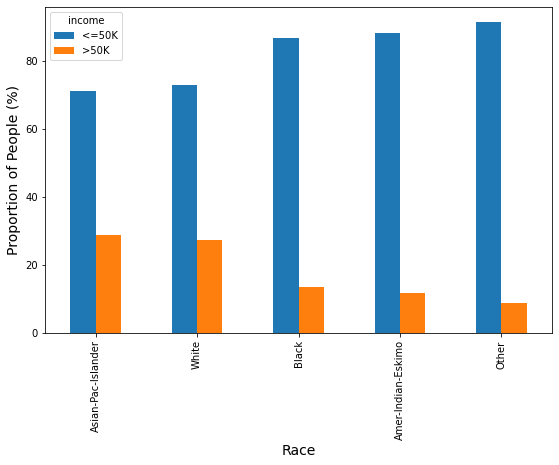

In [48]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(race.div(race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

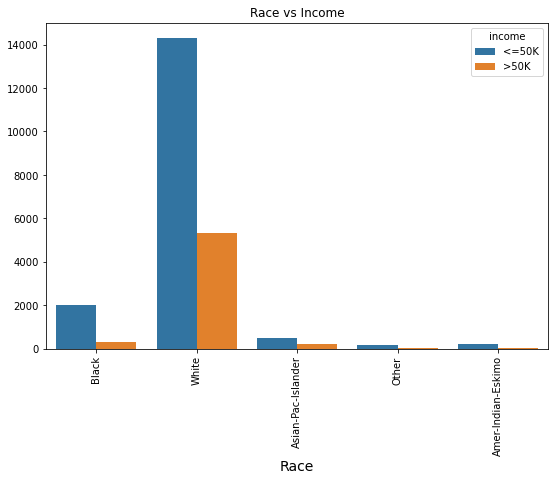

In [49]:
fig = plt.figure(figsize = (9,6))
ax=sns.countplot(train_datavis['race'], hue=train_datavis['income'])
ax.set_title('Race vs Income')
plt.xlabel("Race",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

### Viz Sex

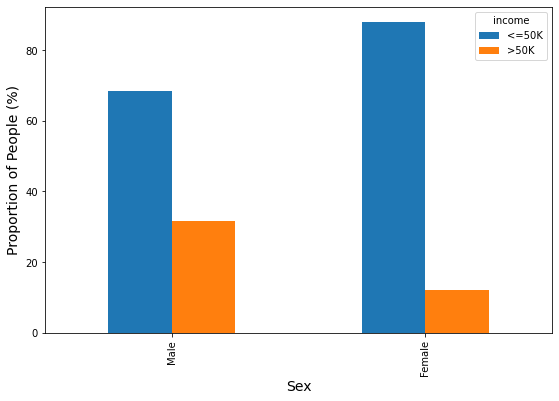

In [50]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(sextype.div(sextype.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

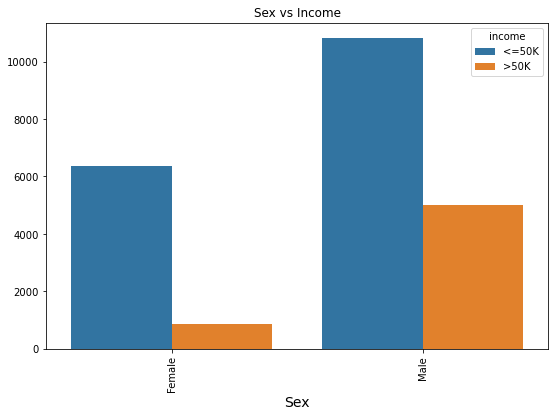

In [51]:
fig = plt.figure(figsize = (9,6))
ax=sns.countplot(train_datavis['sex'], hue=train_datavis['income'])
ax.set_title('Sex vs Income')
plt.xlabel("Sex",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

###Viz Age

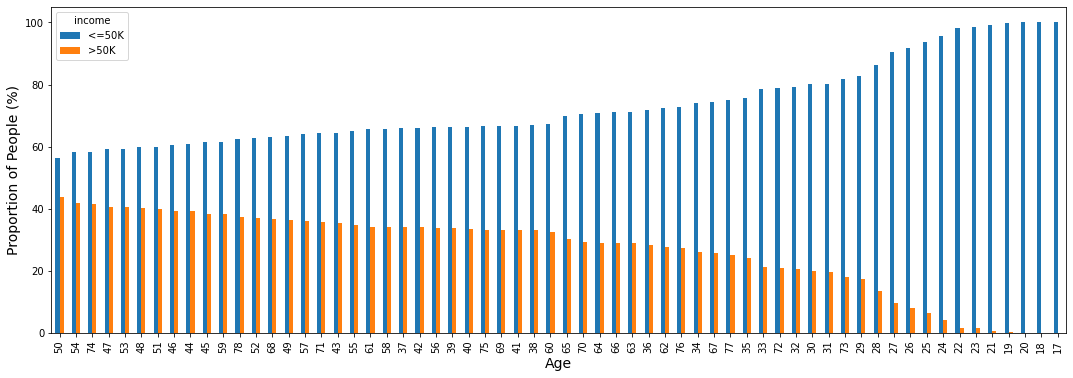

In [52]:
fig = plt.figure(figsize = (40,6))
ax = fig.add_subplot(1,2,2)
(age.div(age.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Age',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

### Viz Relationship

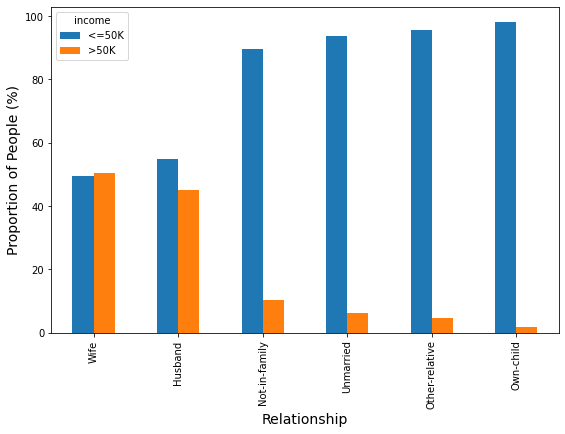

In [53]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(relasi.div(relasi.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Relationship',fontsize = 14);
plt.ylabel('Proportion of People (%)',fontsize = 14);

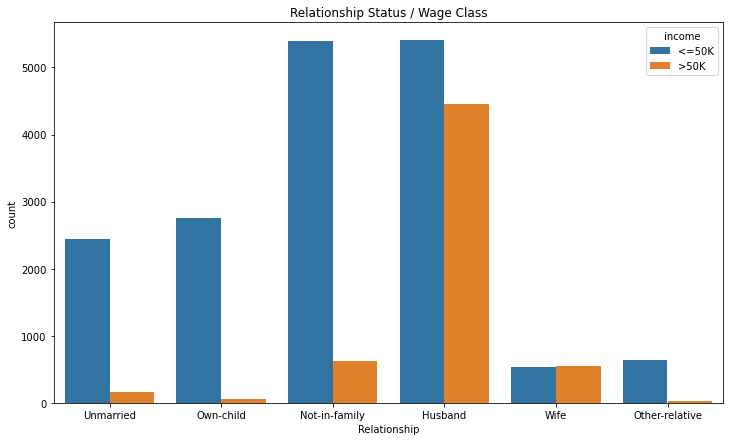

In [54]:
plt.figure(figsize=(12,7))
ax=sns.countplot(train_datavis['relationship'], hue=train_datavis['income'])
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

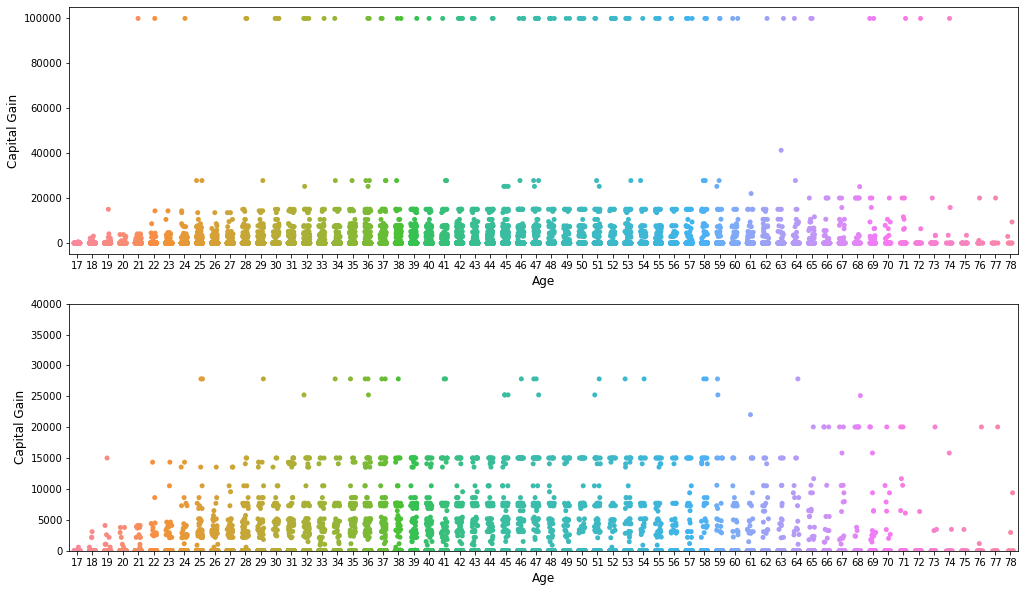

In [55]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = train_datavis, jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = train_datavis, jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

##CATPLOT VIZ

<Figure size 1440x1440 with 0 Axes>

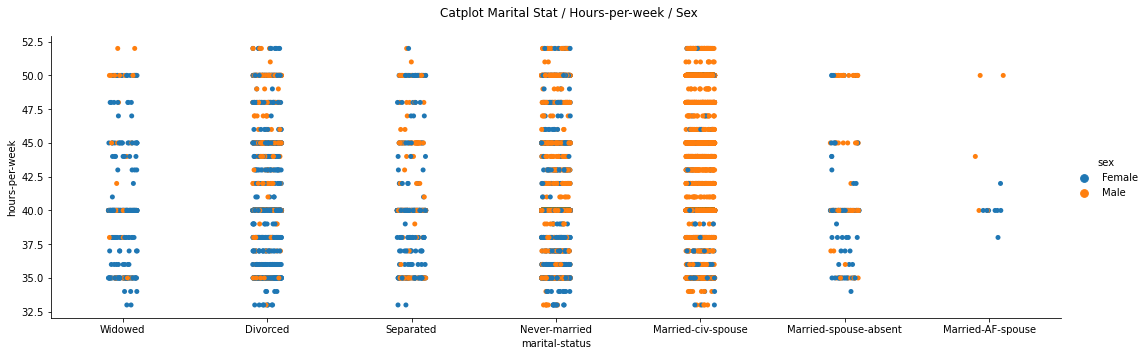

In [56]:
plt.figure(figsize=(20,20))
ax = sns.catplot(x ='marital-status' , y= 'hours-per-week',hue = 'sex', data=train_datavis, height= 5, aspect= 3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Catplot Marital Stat / Hours-per-week / Sex')
plt.show()

In [57]:
#plt.figure(figsize=(20,20))
#sns.catplot(x ='education' , y= 'occupation',hue = 'sex', data=train_datavis, height= 5, aspect= 3)
#ax.fig.subplots_adjust(top=0.9)
#ax.fig.suptitle('Occupation / Education / Sex')
#plt.show()

<Figure size 1440x1440 with 0 Axes>

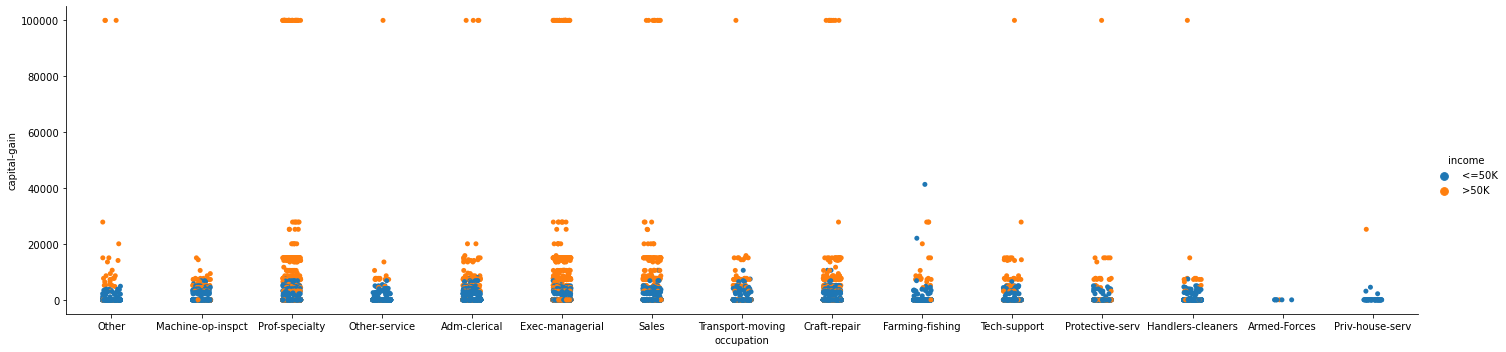

In [58]:
plt.figure(figsize=(20,20))
sns.catplot(x ='occupation' , y= 'capital-gain',hue = 'income', data=train_datavis, height= 5, aspect= 4)
#ax.fig.subplots_adjust(top=1.05)
#ax.fig.suptitle('Catplot Capital Gain / Occupation / Income')
plt.show()

<Figure size 1440x1440 with 0 Axes>

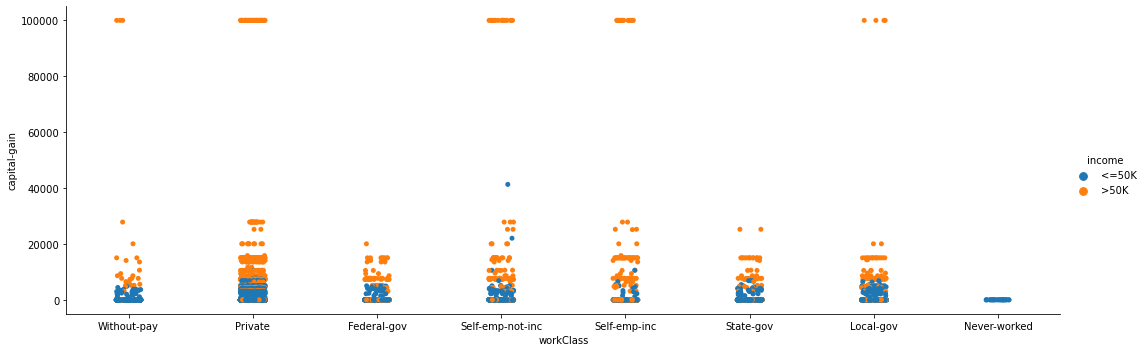

In [59]:
plt.figure(figsize=(20,20))
sns.catplot(x ='workClass' , y= 'capital-gain',hue = 'income', data=train_datavis, height= 5, aspect= 3)
#ax.fig.subplots_adjust(top=0.9)
#ax.fig.suptitle('Catplot Marital Stat / Hours-per-week / Sex')
plt.show()

<Figure size 1440x1440 with 0 Axes>

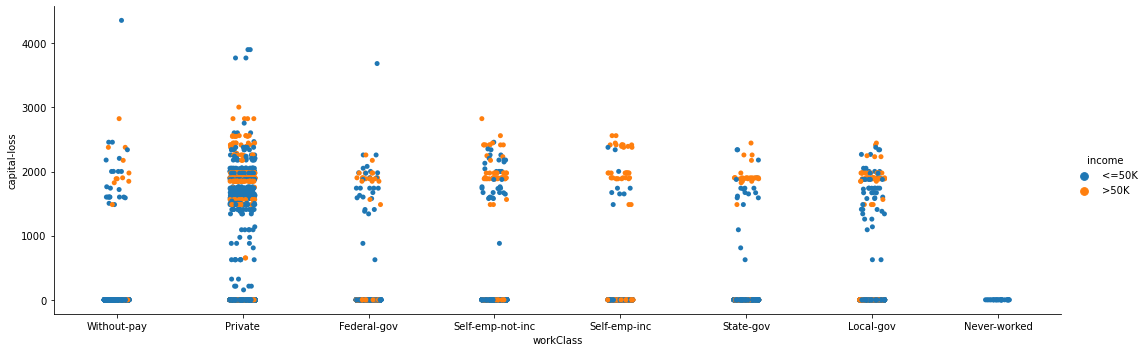

In [60]:
plt.figure(figsize=(20,20))
sns.catplot(x ='workClass' , y= 'capital-loss',hue = 'income', data=train_datavis, height= 5, aspect= 3)
plt.show()

<Figure size 1440x1440 with 0 Axes>

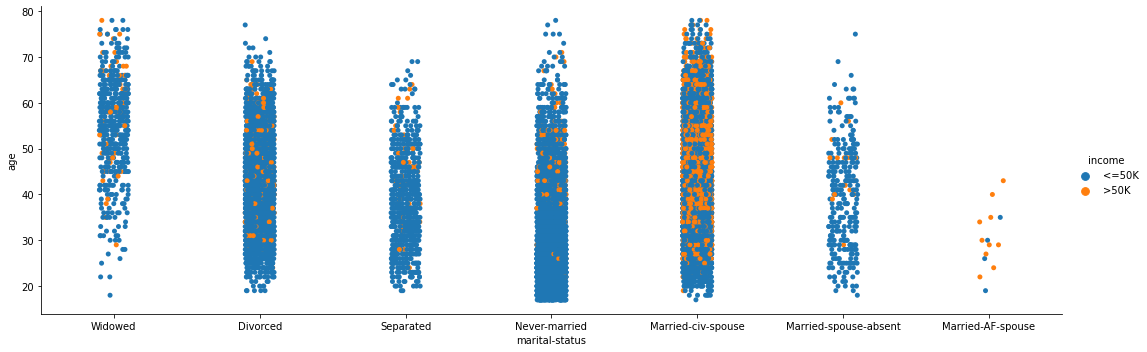

In [61]:
plt.figure(figsize=(20,20))
sns.catplot(x ='marital-status' , y= 'age',hue = 'income', data=train_datavis, height= 5, aspect= 3)
plt.show()

In [62]:
#plt.figure(figsize=(20,20))
#sns.catplot(x='education' , y='workClass',hue='income', data=train_datavis, height= 5, aspect= 3)
#plt.show()

<Figure size 1440x1440 with 0 Axes>

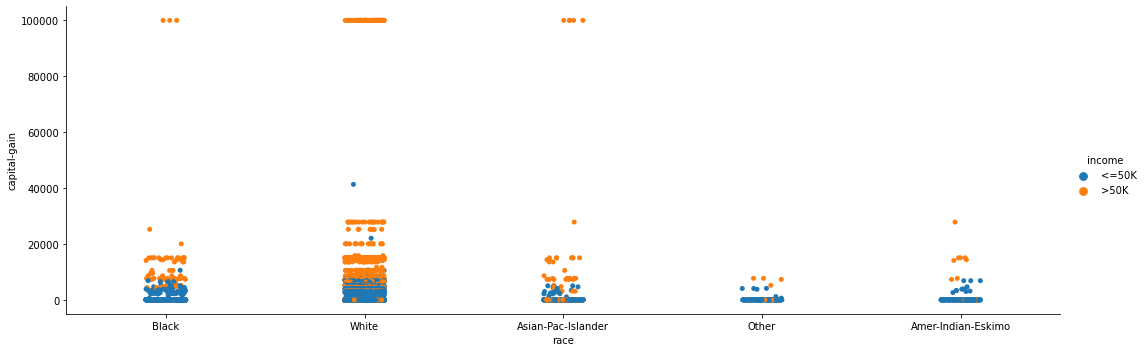

In [63]:
plt.figure(figsize=(20,20))
sns.catplot(x ='race' , y= 'capital-gain',hue = 'income', data=train_datavis, height= 5, aspect= 3)
plt.show()

In [64]:
train_datavis_plot = train_datavis

In [65]:
train_datavis_plot['age'] = pd.cut(train_datavis_plot['age'], 
                                   bins = [0,18,36,50,65,90], 
                                   labels = ['0-17', '18-35', '36-50', '51-65', '65+'])

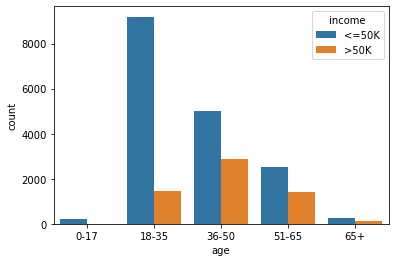

In [66]:
sns.countplot(x ='age', hue = 'income', data = train_datavis_plot)

In [67]:
train_datavis_plot['hours-per-week'] = pd.cut(train_datavis_plot['hours-per-week'], 
                                         bins = [30,40,50,55], 
                                   labels = ['30-39', '40-49', '49+'])

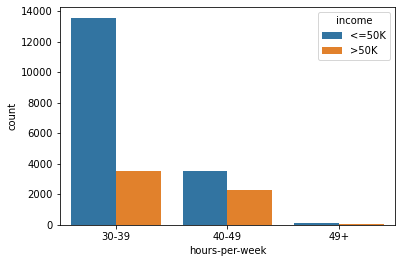

In [68]:
sns.countplot(x ='hours-per-week', hue = 'income', data = train_datavis_plot)

# Modeling

## Logistic Regression

In [69]:
import pandas as pd

# Split Feature Vector and Label
X_LG = train_data_One.drop(['income'], axis = 1) 
y_LG = train_data_One.iloc[:,2]

In [70]:
y_LG

2        0
3        0
4        0
5        0
6        0
        ..
32555    1
32556    0
32557    0
32558    1
32559    0
Name: income, Length: 23058, dtype: int32

In [71]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
LG_X_train, LG_X_test,LG_y_train,LG_y_test = train_test_split(X_LG,
                                                y_LG,
                                                test_size = 0.3,
                                                random_state = 42)

In [72]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(LG_X_train, LG_y_train)

LogisticRegression(random_state=42)

In [73]:
y_predicted = logreg.predict(LG_X_test)
y_predicted

from sklearn.metrics import classification_report, confusion_matrix
print('\nConfustion Matrix') # generate the confusion matrix
print(confusion_matrix(LG_y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(LG_y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(LG_y_test, y_predicted))


Confustion Matrix
[[4708  394]
 [ 801 1015]]

Test Accuracy
0.827262214512865

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      5102
           1       0.72      0.56      0.63      1816

    accuracy                           0.83      6918
   macro avg       0.79      0.74      0.76      6918
weighted avg       0.82      0.83      0.82      6918



## Decision Tree

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [75]:
train_data_DT =  pd.get_dummies(train_data)

In [76]:
#Label Encoding
# A = train_data_DT.iloc[:,0:-1]
# B = train_data_DT.iloc[:,-1]

#One Hot Encoding
A = train_data_One.drop(['income'], axis = 1) 
B = train_data_One.iloc[:,2]
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(A,B, test_size = 1/3 , random_state = 42)

In [77]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(X_trainDT,y_trainDT)

DecisionTreeClassifier()

In [78]:
predtree = dectree.predict(X_testDT)
accurtree = accuracy_score(y_testDT, predtree)
#print(f'Out-of-bag score estimate: {dectree.oob_score_:.3}')
print(f'Mean accuracy score: {accurtree:.5}')

Mean accuracy score: 0.81356


In [79]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix') # generate the confusion matrix
print(confusion_matrix(y_testDT,predtree))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_testDT,predtree))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_testDT,predtree)) # generate the precision, recall, f-1 score, num


Confusion Matrix
[[5141  540]
 [ 893 1112]]

Test Accuracy
0.8135571168358053

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5681
           1       0.67      0.55      0.61      2005

    accuracy                           0.81      7686
   macro avg       0.76      0.73      0.74      7686
weighted avg       0.81      0.81      0.81      7686



[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

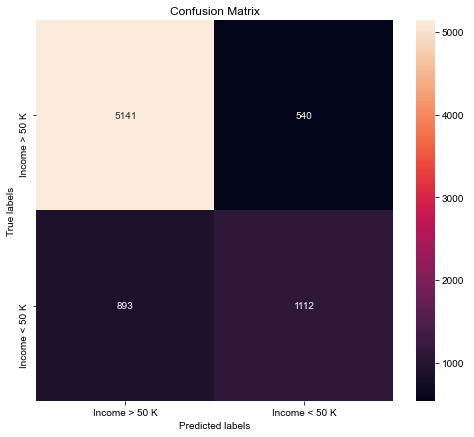

In [80]:
cmtree = confusion_matrix(y_testDT, predtree)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cmtree, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])

## Random Forest

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [82]:
train_data_RF =  pd.get_dummies(train_data)

In [83]:
#Label Encoding
# X = train_data_RF.iloc[:,0:-1]
# y = train_data_RF.iloc[:,-1]

#One Hot Encoding
X = train_data_One.drop(['income'], axis = 1) 
y = train_data_One.iloc[:,2]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3 , random_state = 42)

In [84]:
rf = RandomForestClassifier(max_depth=25,n_estimators=200, min_samples_leaf=1,min_samples_split=50,criterion='entropy', oob_score=True,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [85]:
predrf = rf.predict(X_test)
accurrf = accuracy_score(y_test, predrf)
#print(f'Out-of-bag score estimate: {dectree.oob_score_:.3}')
print(f'Accuracy score: {accurrf:.5}')

Accuracy score: 0.83841


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix') # generate the confusion matrix
print(confusion_matrix(y_test,predrf))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test,predrf))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test,predrf)) # generate the precision, recall, f-1 score, num


Confusion Matrix
[[5311  370]
 [ 872 1133]]

Test Accuracy
0.8384074941451991

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5681
           1       0.75      0.57      0.65      2005

    accuracy                           0.84      7686
   macro avg       0.81      0.75      0.77      7686
weighted avg       0.83      0.84      0.83      7686



In [87]:
# cm = confusion_matrix(y_test, predicted)
# fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
# sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels');
# ax.set_title('Confusion Matrix')
# sns.set(font_scale=1.5)
# ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
# ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])

## Naive bayes

In [88]:
train_data_One

,capital-gain,hours-per-week,income,age_Above-productive,age_Aged,age_Productive-age,workClass_Government,workClass_Not-work,workClass_Private,workClass_Without-pay,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Asia,native-country_Europe,native-country_South America,native-country_USA
2,0,40,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,40,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,0,45,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
6,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,40,1,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
32556,0,40,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
32557,0,38,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
32558,0,40,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [89]:
# Label Encoding
# X_NB = train_data_RF.iloc[:,0:-1]
# y_NB = train_data_RF.iloc[:,-1]

# One Hot Encoding
X_NB = train_data_One.drop(['income'], axis = 1) 
y_NB = train_data_One.iloc[:,2]

In [90]:
from sklearn.model_selection import train_test_split 
NB_X_train, NB_X_test,NB_y_train,NB_y_test = train_test_split(X_NB,
                                                y_NB,
                                                test_size = 0.3,
                                                random_state = 42)

In [91]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(NB_X_train,NB_y_train)

GaussianNB()

In [92]:
TestpredNB = model_NB.predict(NB_X_test)
TrainpredNB = model_NB.predict(NB_X_train)

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Train data
#print("Accuracy Train:",metrics.accuracy_score(NB_y_train, TrainpredNB))
print("Train Accuracy : ",model_NB.score(NB_X_train,NB_y_train))
print(classification_report(NB_y_train,TrainpredNB))
print(confusion_matrix(NB_y_train,TrainpredNB))
print(accuracy_score(NB_y_train,TrainpredNB))
# Test data
#print("Accuracy Test:",metrics.accuracy_score(NB_y_test, TestpredNB))
print('\nConfusion Matrix')
print(confusion_matrix(NB_y_test,TestpredNB))
print("\nTest Accuracy : ",model_NB.score(NB_X_test,NB_y_test))
print('\nClassification Report')
print(classification_report(NB_y_test,TestpredNB))
#print(accuracy_score(NB_y_test,TestpredNB))

Train Accuracy :  0.7961586121437423
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     12076
           1       0.57      0.76      0.65      4064

    accuracy                           0.80     16140
   macro avg       0.74      0.78      0.75     16140
weighted avg       0.82      0.80      0.80     16140

[[9779 2297]
 [ 993 3071]]
0.7961586121437423

Confusion Matrix
[[4120  982]
 [ 444 1372]]

Test Accuracy :  0.7938710610002891

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5102
           1       0.58      0.76      0.66      1816

    accuracy                           0.79      6918
   macro avg       0.74      0.78      0.76      6918
weighted avg       0.82      0.79      0.80      6918



[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

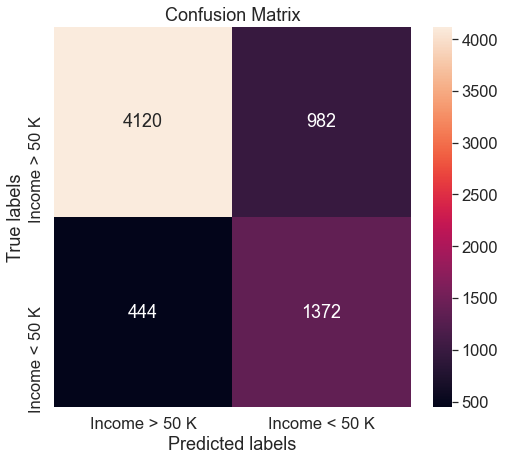

In [94]:
NB_cm = confusion_matrix(NB_y_test, TestpredNB)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(NB_cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])

## KNN

In [95]:
import pandas as pd
import numpy as np

In [96]:
train_data_RF =  pd.get_dummies(train_data)

In [97]:
train_data_RF.head()

,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,2,0,3,0,15,2,2,0,0,1,40,0,0
3,1,3,2,0,6,2,1,0,0,1,40,0,0
4,0,3,3,0,5,5,1,0,0,1,40,0,0
5,0,3,3,0,13,2,1,0,0,1,45,0,0
6,0,3,3,0,3,2,1,1,0,1,40,0,0


In [98]:
train_data_RF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23058 entries, 2 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             23058 non-null  int32
 1   workClass       23058 non-null  int32
 2   education       23058 non-null  int32
 3   marital-status  23058 non-null  int32
 4   occupation      23058 non-null  int32
 5   relationship    23058 non-null  int32
 6   race            23058 non-null  int32
 7   sex             23058 non-null  int32
 8   capital-gain    23058 non-null  int32
 9   capital-loss    23058 non-null  int32
 10  hours-per-week  23058 non-null  int64
 11  native-country  23058 non-null  int32
 12  income          23058 non-null  int32
dtypes: int32(12), int64(1)
memory usage: 1.4 MB


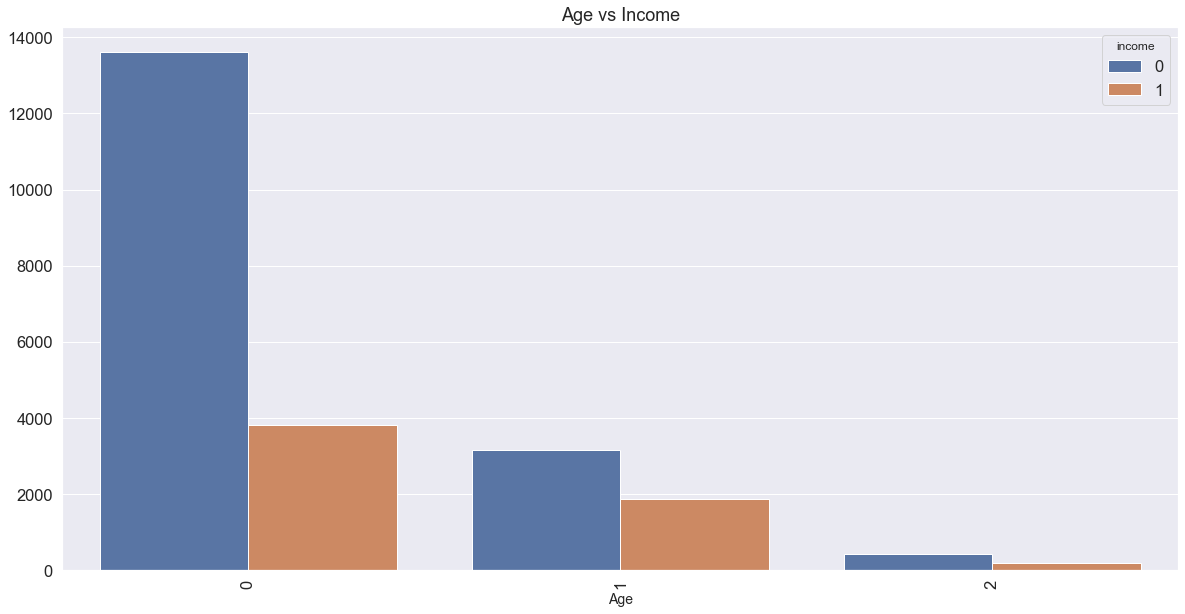

In [99]:
fig = plt.figure(figsize = (20,10))
ax=sns.countplot(train_data_RF['age'], hue=train_data_RF['income'])
ax.set_title('Age vs Income')
plt.xlabel("Age",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred = classifier.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))
print("\nTest Accuracy : ",(accuracy_score(y_test,y_pred)))
print("\nClassification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[5032  649]
 [ 901 1104]]

Test Accuracy :  0.7983346344002081

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5681
           1       0.63      0.55      0.59      2005

    accuracy                           0.80      7686
   macro avg       0.74      0.72      0.73      7686
weighted avg       0.79      0.80      0.79      7686



[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

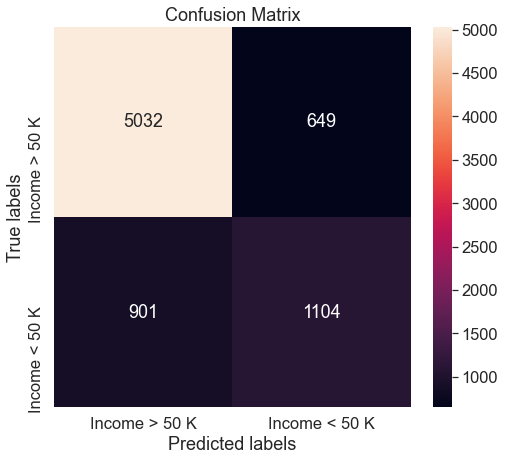

In [104]:
cm = confusion_matrix(y_test, y_pred)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])

## XGBoost

In [105]:
from xgboost import XGBClassifier
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Label Encoding
# X_GB = train_data_RF.iloc[:,0:-1]
# y_GB = train_data_RF.iloc[:,-1]

# One Hot Encoding
X_GB = train_data_One.drop(['income'], axis = 1) 
y_GB = train_data_One.iloc[:,3]

In [ ]:
y_GB

In [ ]:
from sklearn.model_selection import train_test_split 
GB_X_train, GB_X_test,GB_y_train,GB_y_test = train_test_split(X_GB,
                                                y_GB,
                                                test_size = 0.3,
                                                random_state = 42)

In [ ]:
model = XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=300,booster="gbtree",reg_lambda=0.5,reg_alpha=0.5)
model.fit(GB_X_train, GB_y_train)

In [ ]:
y_pred_xgb = model.predict(GB_X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(GB_y_test, y_pred_xgb))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix')
print(confusion_matrix(GB_y_test, y_pred_xgb))
print('\nTest Accuracy')
print(metrics.accuracy_score(GB_y_test, y_pred_xgb))
print('\nClassification Report')
print(classification_report(GB_y_test, y_pred_xgb))

# Cross Validation

In [ ]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.tree import DecisionTreeClassifier #Decision Tree

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','XGBoost']
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(), KNeighborsClassifier(n_neighbors=9),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

# Feature Importance

In [ ]:
X = train_data[['age', 'capital-gain', 'sex', 'marital-status','relationship','hours-per-week','capital-loss','workClass', 'education','occupation']]
y = train_data['income']
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(10) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('age', 'capital-gain', 'sex', 'marital-status','relationship','capital-loss','hours-per-week','workClass', 'education','occupation'))
plt.grid(True)

In [ ]:
train_datavis['relationship'].unique()